## Using the Robitaille (2017) YSO SED models

This notebook demonstrates how to use the YSO SED models published in Robitaille (2017).

### Format

The [published models](https://doi.org/10.5281/zenodo.166732) include a tar file for each set of models. The name of each
model set is composed of several characters that indicate which component is present. The characters, in order, are:

* ``s`` (star)
* ``p`` (passive disk)
* ``p`` (power-law envelope) or ``u`` (Ulrich envelope)
* ``b`` (bipolar cavities)
* ``h`` (inner hole)
* ``m`` (ambient medium)
* ``i`` (interstellar dust).

If a component is absent, a hyphen (``-``) is given instead.

Each tar file expands to give a directory with the same model set name. The format for each directory is described [here](http://sedfitter.readthedocs.io/en/stable/). 

The easiest way to access and fit these models in Python is to make use of the [astropy](http://www.astropy.org) and [sedfitter](http://sedfitter.readthedocs.io) packages.

### Accessing Parameters

Each model directory contains a ``parameters.fits`` file that includes the parameters for all the models. To read this, you can use for example the [astropy.table](http://docs.astropy.org/en/stable/table/index.html) package:

In [1]:
from astropy.table import Table

In [2]:
t = Table.read('sp--s-i/parameters.fits')

We can take a look at the first 15 rows of the table:

In [3]:
t[:15]

MODEL_NAME,star.radius,star.temperature,disk.mass,disk.rmax,disk.beta,disk.p,disk.h100,scattering,inclination
bytes20,float64,float64,float64,float64,float64,float64,float64,int64,float64
001eAZq2_01,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,9.314596555532965
001eAZq2_02,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,15.44758964099457
001eAZq2_03,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,25.54659958006153
001eAZq2_04,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,32.228694734201824
001eAZq2_05,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,40.95757230943386
001eAZq2_06,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,52.34196933273999
001eAZq2_07,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,64.34226896337151
001eAZq2_08,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,78.06576257371982
001eAZq2_09,0.3924,5734.0,1.293e-07,621.9,1.031,-1.566,8.384,1,81.54160675010067


The model name is a unique name that identifies each model and the viewing angle is indicated in the suffix (e.g. ``_01``). The value of the inclination is also given in the ``inclination`` column. The remaining columns give the parameters for the models (which columns are present depends on the model set). The scattering column indicates whether scattered light is included in the SEDs (for some very optically thick models, scattering was disabled).

### Accessing SEDs

The easiest way to access the SEDs in Python is to use the ``SEDCube`` class from the sedfitter package to read in the ``flux.fits`` file for the model set you are interested in:

In [2]:
from sedfitter.sed import SEDCube

In [26]:
seds = SEDCube.read('../data/YSOmodels/s-u-hmi/flux.fits')
sed = seds.get_sed('aG2jE1qQ_09')

This 'SED cube' is an efficient way to store the models fluxes in a single 3D array, where the three dimensions are the model, the aperture, and the wavelength.

The model names can be accessed with:

In [4]:
print(seds.names)

['0' '1' '2' ... '9997' '9998' '9999']


while the apertures, wavelengths, and frequencies can be accessed with:

In [5]:
print(seds.apertures)

[1.00000000e+02 1.62377674e+02 2.63665090e+02 4.28133240e+02
 6.95192796e+02 1.12883789e+03 1.83298071e+03 2.97635144e+03
 4.83293024e+03 7.84759970e+03 1.27427499e+04 2.06913808e+04
 3.35981829e+04 5.45559478e+04 8.85866790e+04 1.43844989e+05
 2.33572147e+05 3.79269019e+05 6.15848211e+05 1.00000000e+06] AU


In [6]:
print(seds.wav)

[5.01187234e+03 4.69198682e+03 4.39251818e+03 4.11216329e+03
 3.84970220e+03 3.60399284e+03 3.37396601e+03 3.15862077e+03
 2.95702006e+03 2.76828663e+03 2.59159921e+03 2.42618897e+03
 2.27133612e+03 2.12636684e+03 1.99065031e+03 1.86359595e+03
 1.74465092e+03 1.63329761e+03 1.52905149e+03 1.43145894e+03
 1.34009528e+03 1.25456296e+03 1.17448979e+03 1.09952733e+03
 1.02934940e+03 9.63650604e+02 9.02145074e+02 8.44565168e+02
 7.90660331e+02 7.40196000e+02 6.92952582e+02 6.48724502e+02
 6.07319304e+02 5.68556815e+02 5.32268363e+02 4.98296042e+02
 4.66492022e+02 4.36717912e+02 4.08844151e+02 3.82749448e+02
 3.58320254e+02 3.35450266e+02 3.14039968e+02 2.93996194e+02
 2.75231725e+02 2.57664909e+02 2.41219304e+02 2.25823349e+02
 2.11410050e+02 1.97916687e+02 1.85284545e+02 1.73458657e+02
 1.62387563e+02 1.52023087e+02 1.42320130e+02 1.33236469e+02
 1.24732578e+02 1.16771453e+02 1.09318451e+02 1.02341140e+02
 9.58091606e+01 8.96940882e+01 8.39693136e+01 7.86099259e+01
 7.35926041e+01 6.889551

In [7]:
print(seds.nu)

[5.98164594e+10 6.38945652e+10 6.82507039e+10 7.29038311e+10
 7.78741945e+10 8.31834222e+10 8.88546170e+10 9.49124569e+10
 1.01383302e+11 1.08295310e+11 1.15678557e+11 1.23565173e+11
 1.31989473e+11 1.40988118e+11 1.50600262e+11 1.60867734e+11
 1.71835211e+11 1.83550417e+11 1.96064331e+11 2.09431406e+11
 2.23709808e+11 2.38961668e+11 2.55253354e+11 2.72655757e+11
 2.91244605e+11 3.11100784e+11 3.32310697e+11 3.54966638e+11
 3.79167193e+11 4.05017668e+11 4.32630552e+11 4.62125998e+11
 4.93632355e+11 5.27286720e+11 5.63235538e+11 6.01635239e+11
 6.42652915e+11 6.86467053e+11 7.33268306e+11 7.83260328e+11
 8.36660655e+11 8.93701655e+11 9.54631539e+11 1.01971544e+12
 1.08923656e+12 1.16349743e+12 1.24282117e+12 1.32755297e+12
 1.41806153e+12 1.51474069e+12 1.61801114e+12 1.72832226e+12
 1.84615406e+12 1.97201927e+12 2.10646560e+12 2.25007807e+12
 2.40348161e+12 2.56734374e+12 2.74237749e+12 2.92934452e+12
 3.12905839e+12 3.34238816e+12 3.57026210e+12 3.81367180e+12
 4.07367645e+12 4.351407

A ``valid`` flag is used to indicate models that do not have complete/valid SEDs (for example because the model run did not complete):

In [8]:
print(seds.valid)

[False  True  True ...  True  True  True]


The fluxes and errors can be obtained using the ``val`` and
``error`` attributes. We can check the shape of these arrays to check that they are indeed 3D arrays:

In [9]:
seds.val.shape

(10000, 20, 200)

In [10]:
#seds.error.shape
seds.unc.shape

(10000, 20, 200)

For this model set, there are 90000 models (10000 physical models times 9 inclinations), 20 apertures, and 200 wavelengths.

To access a specific SED, you can call ``seds.get_sed`` using a particular
model name:

In [13]:
sed = seds.get_sed('542')

The wavelength, flux, and error can then be accessed with:

In [43]:
print(sed.wav)

[5.01187234e+03 4.69198682e+03 4.39251818e+03 4.11216329e+03
 3.84970220e+03 3.60399284e+03 3.37396601e+03 3.15862077e+03
 2.95702006e+03 2.76828663e+03 2.59159921e+03 2.42618897e+03
 2.27133612e+03 2.12636684e+03 1.99065031e+03 1.86359595e+03
 1.74465092e+03 1.63329761e+03 1.52905149e+03 1.43145894e+03
 1.34009528e+03 1.25456296e+03 1.17448979e+03 1.09952733e+03
 1.02934940e+03 9.63650604e+02 9.02145074e+02 8.44565168e+02
 7.90660331e+02 7.40196000e+02 6.92952582e+02 6.48724502e+02
 6.07319304e+02 5.68556815e+02 5.32268363e+02 4.98296042e+02
 4.66492022e+02 4.36717912e+02 4.08844151e+02 3.82749448e+02
 3.58320254e+02 3.35450266e+02 3.14039968e+02 2.93996194e+02
 2.75231725e+02 2.57664909e+02 2.41219304e+02 2.25823349e+02
 2.11410050e+02 1.97916687e+02 1.85284545e+02 1.73458657e+02
 1.62387563e+02 1.52023087e+02 1.42320130e+02 1.33236469e+02
 1.24732578e+02 1.16771453e+02 1.09318451e+02 1.02341140e+02
 9.58091606e+01 8.96940882e+01 8.39693136e+01 7.86099259e+01
 7.35926041e+01 6.889551

In [44]:
print(sed.flux)

[[1019.88490885 1015.69249919 1000.88567644 ...  987.88072328
  1017.19369212  982.97066723]
 [1008.05432143  986.29199703 1046.64936527 ... 1001.15843306
   995.58467929  999.0554274 ]
 [1000.83669747 1012.14513633 1033.64906035 ...  984.73108366
  1002.38818574 1008.7918569 ]
 ...
 [1022.45156871 1007.94159303  983.06503953 ... 1021.85500842
  1006.03756308  985.01253197]
 [1022.48821541  990.21327695 1019.4066708  ...  991.0228582
   988.87489342  975.57885962]
 [1006.59155601  991.10799636  948.36004099 ...  985.8536225
  1006.51249256 1009.22888222]] mJy


In [45]:
print(sed.error)

[[0.01475072 0.01263705 0.00486055 ... 0.01498738 0.01668646 0.01978323]
 [0.01861266 0.01141031 0.00991927 ... 0.00202515 0.00114081 0.00071169]
 [0.00308815 0.00682411 0.00939377 ... 0.00657963 0.00595222 0.00943978]
 ...
 [0.01476257 0.00557259 0.00220041 ... 0.00947232 0.00951495 0.01633698]
 [0.00281971 0.00971929 0.00856013 ... 0.00663671 0.00285464 0.00348951]
 [0.00624854 0.0002224  0.0014395  ... 0.00743971 0.00924233 0.00437694]] mJy


The SED is a 2D array with dimensions the number of apertures (20) and the number of wavelengths (200):

In [46]:
sed.flux.shape

(20, 200)

We can use this to visualize the SED:

In [3]:
import numpy as np
import astropy.constants as const
import astropy.units as u

In [86]:
# Planck's law using wavelengths
def planck(wav, T):
    num = 2 * const.h.value * const.c.value**2 / wav**5
    denom = np.exp( (const.h.value*const.c.value) / (wav * const.k_B.value * T)) - 1
    return num / denom

In [ ]:
wavel = np.logspace(-1,2,200)
#nu = const.c.value/(wavel*10**-6)
B = np.zeros((10000,200))
i=0
for T in np.linspace(200,5199.5,10000):
    B[i] = planck(wavel*10**-6,T)
    i+=1
B = B * u.W / u.m**3
B = B.to(u.mJy)
#print(B.unit)

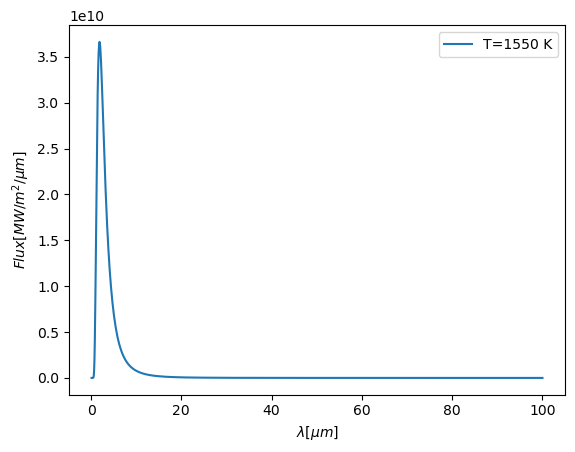

In [130]:
temp = 1550
plt.plot(wavel,B[2*(temp-200)], label = f'T={temp} K')
plt.xlabel(r'$\lambda [\mu m]$')
plt.ylabel(r'$Flux [MW / m^2 / \mu m]$')
plt.legend()

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
seds = SEDCube.read('../data/galaxySEDs/Blue_SF_glx/flux.fits')

In [15]:
seds.names

chararray(['Blue_SF_glx'], dtype='<U20')

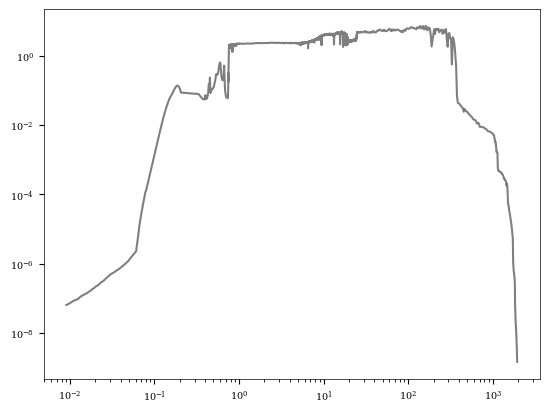

In [16]:
_ = plt.loglog(seds.get_sed('Blue_SF_glx').wav, seds.get_sed('Blue_SF_glx').flux.transpose(), 'k-', alpha=0.5)
#_ = plt.ylim(1e-2, 1e8)

### Fitting SEDs to data

To fit SEDs to observed data,  you can also make use of the [sedfitter](http://sedfitter.readthedocs.io) package. What follows is a very short example - for more information on using the sedfitter package, be sure to read over the [documentation](http://sedfitter.readthedocs.io).

To demonstrate this, we will fit the above models to the data for the NGC2264 source modelled in Robitaille (2017):

In [30]:
%cat data_ngc2264_20.txt

20                             100.20250   9.59936 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 3 3   0.000e+00   0.000e+00   0.000e+00   0.000e+00   1.505e-02   1.505e-03   1.039e-01   1.039e-02   4.707e-01   4.707e-02   9.703e+00   9.703e-01   3.341e+01   3.341e+00   7.543e+01   7.543e+00   1.604e+02   1.604e+01   2.194e+02   2.194e+01   3.057e+02   3.057e+01   4.060e+02   4.060e+01   5.055e+02   5.055e+01   6.670e+02   6.670e+01   9.523e+02   9.523e+01   1.172e+03   1.172e+02   1.239e+03   1.239e+02   1.331e+03   1.331e+02   1.290e+03   1.290e+02   0.000e+00   0.000e+00   3.294e+03   1.000e+00   2.900e+02   1.000e+00 



We start off by setting up  the list of filters/wavelengths and approximate aperture radii used:

In [1]:
from astropy import units as u

In [2]:
filters = ['BU', 'BB', 'BV', 'BR', 'BI', '2J', '2H', '2K', 'I1', 'I2',
           5.580 * u.micron, 7.650 * u.micron, 9.95 * u.micron,
           12.93 * u.micron, 17.72 * u.micron, 24.28 * u.micron,
           29.95 * u.micron, 35.06 * u.micron,
           'M2', 'M3', 'W1', 'W2']

In [19]:
# Filters from online
filterstest = [.365 * u.um, .445 * u.um, .551 * u.um, .658 * u.um, .806 * u.um, 
               1.235 * u.um, 1.662 * u.um, 2.159 * u.um, 3.551 * u.um, 4.493 * u.um,
               5.580 * u.um, 7.650 * u.um, 9.95 * u.um, 12.93 * u.um, 17.72 * u.um, 24.28 * u.um,
               29.95 * u.um, 35.06 * u.um, 71.42 * u.um, 155.9 * u.um, 449 * u.um, 861 * u.um]

In [5]:
# Filter wavelengths exactly matching Robitailles
filterstest2 = [.36 * u.um, .44 * u.um, .55 * u.um, .64 * u.um, .79 * u.um, 
               1.235 * u.um, 1.662 * u.um, 2.159 * u.um, 3.55 * u.um, 4.493 * u.um,
               5.580 * u.um, 7.650 * u.um, 9.95 * u.um, 12.93 * u.um, 17.72 * u.um, 24.28 * u.um,
               29.95 * u.um, 35.06 * u.um, 71.42 * u.um, 155.9 * u.um, 443.0 * u.um, 863.0 * u.um]

In [6]:
apertures = [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
             3., 3., 20., 30., 30., 30.] * u.arcsec

In [13]:
aperturestest = [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
             3., 3., 20., 30., 30., 30.] * u.arcsec
filters8 = ['BU', 'BB', 'BV', 'BR', 'BI', '2J', '2H', '2K', 'I1', 'I2',
           'I3', 'I4', 9.95 * u.micron,
           12.93 * u.micron, 17.72 * u.micron, 'M1',
           29.95 * u.micron, 35.06 * u.micron,
           'M2', 'M3', 'W1', 'W2']

We also set up the extinction law used in Robitaille (2017):

In [7]:
from sedfitter.extinction import Extinction

In [8]:
extinction = Extinction.from_file('../data/raw/whitney.r550.par')

Finally, we run the fitting:

In [9]:
import sedfitter

In [ ]:
import os
models = os.listdir('../data/YSOmodels/')
models.remove('.DS_Store')
models

In [18]:
from sedfitter.extinction import Extinction
extinction = Extinction.from_file('../data/raw/whitney.r550.par')

for modelname in models:
    sedfitter.fit('../data/raw/data_ngc2264_20.txt',filters,apertures, '../data/YSOmodels/'+modelname, '../data/outputs/output_ngc2264_'+modelname+'.fitinfo',
                   extinction_law = extinction,
                   distance_range = [0.869,0.961] * u.kpc,
                   av_range = [0.,40.],
                   output_format=('F',3.),
                   output_convolved=False, remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-u-hmi
   Log[d] stepping     :  0.02
   Number of distances :  4

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(90000, 4, 22).  use_memmap=True
   Reading ../data/YSOmodels/s-u-hmi/convolved/BU.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/BB.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/BV.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/BR.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/BI.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/2J.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/2H.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/2K.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/I1.fits
   Reading ../data/YSOmodels/s-u-hmi/convolved/I2.fits
   Read

In [35]:
sedfitter.fit('../data/raw/data_ngc2264_20.txt', filterstest, apertures, '../data/YSOmodels/b-s',
              'output_ngc2264_b-s.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  b-s
   Log[d] stepping     :  0.02
   Number of distances :  4

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(10000, 4, 22).  use_memmap=True
   Reading fluxes at 0.365 um
   Reading fluxes at 0.445 um
   Reading fluxes at 0.551 um
   Reading fluxes at 0.658 um
   Reading fluxes at 0.806 um
   Reading fluxes at 1.235 um
   Reading fluxes at 1.662 um
   Reading fluxes at 2.159 um
   Reading fluxes at 3.551 um
   Reading fluxes at 4.493 um
   Reading fluxes at 5.58 um
   Reading fluxes at 7.65 um
   Reading fluxes at 9.95 um
   Reading fluxes at 12.93 um
   Reading fluxes at 17.72 um
   Reading fluxes at 24.28 um
   Reading fluxes at 29.95 um
   Reading fluxes at 35.06 um
   Reading fluxes at 71.

In [16]:
sedfitter.fit('../data/raw/data_ngc2264_20.txt', filterstest2, apertures, '../data/YSOmodels/s-p-hmi',
              'output_ngc2264_s-p-hmi.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s-p-hmi
   Log[d] stepping     :  0.02
   Number of distances :  4

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(10000, 4, 22).  use_memmap=True
   Reading fluxes at 0.36 um
   Reading fluxes at 0.44 um
   Reading fluxes at 0.55 um
   Reading fluxes at 0.64 um
   Reading fluxes at 0.79 um
   Reading fluxes at 1.235 um
   Reading fluxes at 1.662 um
   Reading fluxes at 2.159 um
   Reading fluxes at 3.55 um
   Reading fluxes at 4.493 um
   Reading fluxes at 5.58 um
   Reading fluxes at 7.65 um
   Reading fluxes at 9.95 um
   Reading fluxes at 12.93 um
   Reading fluxes at 17.72 um
   Reading fluxes at 24.28 um
   Reading fluxes at 29.95 um
   Reading fluxes at 35.06 um
   Reading fluxes at 71.42

Delete file output_ngc2264_s-p-hmi.fitinfo? [y/[n]]  y



   # Sources    CPU time (sec)    Sources/sec  
 ----------------------------------------------
          2              0.0          43.14


In [15]:
sedfitter.fit('../data/raw/data_ngc2264_20.txt', filters8, aperturestest, '../data/YSOmodels/s---s-i',
              '../data/processed/output_ngc2264_s---s-i.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

sedfitter.plot('../data/processed/output_ngc2264_s---s-i.fitinfo',
                   output_dir='../data/processed/s---s-itest', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))

sedfitter.fit('../data/raw/data_ngc2264_20.txt', filters8, aperturestest, '../data/YSOmodels/s---s-i2',
              '../data/processed/output_ngc2264_s---s-i2.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

sedfitter.plot('../data/processed/output_ngc2264_s---s-i2.fitinfo',
                   output_dir='../data/processed/s---s-i2test', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  s---s-i
   Log[d] stepping     :  0.02
   Number of distances :  4

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(10000, 4, 22).  use_memmap=True
   Reading ../data/YSOmodels/s---s-i/convolved/BU.fits
   Reading ../data/YSOmodels/s---s-i/convolved/BB.fits
   Reading ../data/YSOmodels/s---s-i/convolved/BV.fits
   Reading ../data/YSOmodels/s---s-i/convolved/BR.fits
   Reading ../data/YSOmodels/s---s-i/convolved/BI.fits
   Reading ../data/YSOmodels/s---s-i/convolved/2J.fits
   Reading ../data/YSOmodels/s---s-i/convolved/2H.fits
   Reading ../data/YSOmodels/s---s-i/convolved/2K.fits
   Reading ../data/YSOmodels/s---s-i/convolved/I1.fits
   Reading ../data/YSOmodels/s---s-i/convolved/I2.fits
   Read

In [18]:
sedfitter.plot('output_ngc2264_s-p-hmi.fitinfo',
                   output_dir='plots_sed4', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))

In [33]:
with open('../data/raw/data_ngc2264_20.txt','r') as file:
    src = np.array(file.readlines()[0].split())
    fluxes = src[25:]
    fluxes = fluxes.astype(float)
    fluxes = fluxes / fluxes[6]
    src[25:] = fluxes.astype(str)
    print(src)

with open('../data/raw/data_ngc2264_20_normalized.txt','w') as babel:
    src2 = ''
    src2 += " ".join(thingbob for thingbob in src)
    babel.write(src2)

['20' '100.20250' '9.59936' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '3' '3' '0.0' '0.0' '0.0' '0.0'
 '0.1448508' '0.0144850' '1.0' '0.0999999' '4.5303176' '0.4530317'
 '93.387872' '9.3387872' '321.55919' '32.155919' '725.98652' '72.598652'
 '1543.7921' '154.37921' '2111.6458' '211.16458' '2942.2521' '294.22521'
 '3907.6034' '390.76034' '4865.2550' '486.52550' '6419.6342' '641.96342'
 '9165.5437' '916.55437' '11280.076' '1128.0076' '11924.927' '1192.4927'
 '12810.394' '1281.0394' '12415.784' '1241.5784' '0.0' '0.0' '31703.561'
 '9.6246390' '2791.1453' '9.6246390']


In [17]:
sedfitter.fit('../data/raw/data_ngc2264_20_normalized.txt', filterstest2, apertures, '../data/galaxySEDs/Ly_break',
              '../data/outputs/output_ngc2264_Ly_break.fitinfo',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.],
              output_format=('F', 3.),
              output_convolved=False, remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  Ly_break
   Log[d] stepping     :  0.02

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(1, 22).  use_memmap=True
   Reading fluxes at 0.36 um
   Reading fluxes at 0.44 um
   Reading fluxes at 0.55 um
   Reading fluxes at 0.64 um
   Reading fluxes at 0.79 um
   Reading fluxes at 1.235 um
   Reading fluxes at 1.662 um
   Reading fluxes at 2.159 um
   Reading fluxes at 3.55 um
   Reading fluxes at 4.493 um
   Reading fluxes at 5.58 um
   Reading fluxes at 7.65 um
   Reading fluxes at 9.95 um
   Reading fluxes at 12.93 um
   Reading fluxes at 17.72 um
   Reading fluxes at 24.28 um
   Reading fluxes at 29.95 um
   Reading fluxes at 35.06 um
   Reading fluxes at 71.42 um
   Reading fluxes at 155.9 um


In [19]:
sedfitter.plot('../data/outputs/output_ngc2264_Ly_break.fitinfo',
                   output_dir='../data/outputs/galaxytest4', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))

We now generate the SED plots with the data to examine the fit:

In [21]:
for model in models:
    sedfitter.plot('../data/outputs/output_ngc2264_'+model+'.fitinfo',
                   output_dir='../data/outputs/plots_sed/'+model, format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))

In [39]:
linecol = sedfitter.plot('output_ngc2264_b-s.fitinfo',
               plot_mode='A',
               select_format=('N', 1),
               show_convolved=False, show_sed=True,
               x_mode='M', x_range=(0.1, 2000),
               y_mode='M', y_range=(1.e-14, 2e-8))


AttributeError: module 'sedfitter' has no attribute 'plot_source_info'

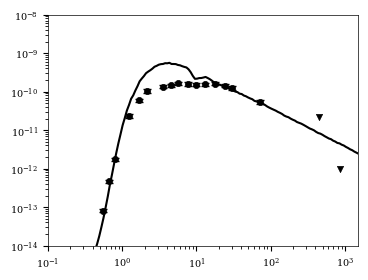

In [41]:
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

original_linecol = linecol['20']['lines']
segments = original_linecol.get_segments()
colors = original_linecol.get_colors()
linestyles = original_linecol.get_linestyles()
linewidths = original_linecol.get_linewidths()

new_linecol = LineCollection(segments, colors=colors, linestyles=linestyles, linewidths=linewidths)

fig, ax = plt.subplots(figsize = (4,3))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.1,1500)
ax.set_ylim(10**-14,10**-8)

ax.add_collection(new_linecol)

sedfitter.plot_source_data(ax, linecol['20']['source'], linecol['20']['filters'])
plot_source_info(ax, )
plt.show()

In [ ]:
from IPython.display import Image, display
import matplotlib.image as mpimg

for model in models:
    display(Image('../data/outputs/plots_sed/'+model+'/20.png'))

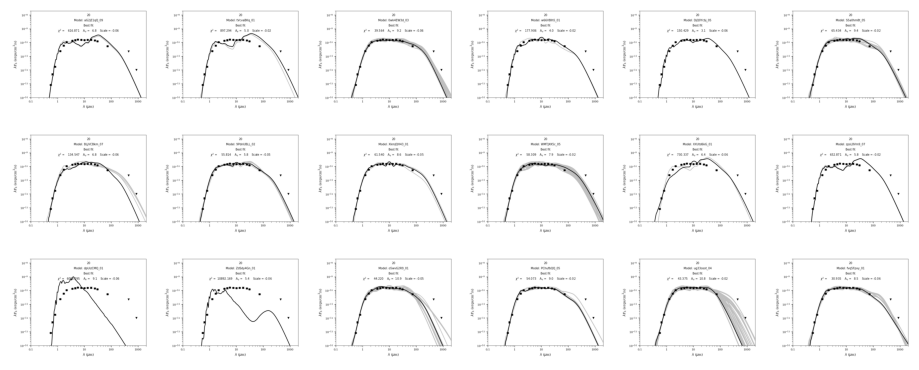

In [96]:
fig, ax = plt.subplots(3,6)
fig.set_size_inches(10,4)
i,j = 0,0
for model in models:
    img = mpimg.imread('../data/outputs/plots_sed/'+model+'/20.png')
    ax[i][j].imshow(img)
    ax[i][j].set_axis_off()
    if j == 5:
        i = i+1
        j = 0
    else: j = j+1
    #print(f'{i},{j}')
fig.subplots_adjust(left = .05, right = .95,top = .95, bottom = .05,hspace = .1,wspace = .1)
#fig.show()
fig.savefig('../data/outputs/finalplot_ngc2264')

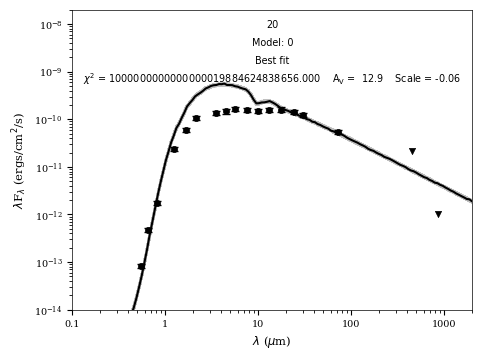

In [41]:
from IPython.display import Image
Image('./plots_sed/20.png')